# Salary Dataset

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#import dataset
import pandas as pd
df=pd.read_csv("empl.csv")


In [3]:
#first 5 rows
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [4]:
#lets chheck the null values in the dataset
df.isnull().sum()
#based on below output we have sum null values which we need to impute

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

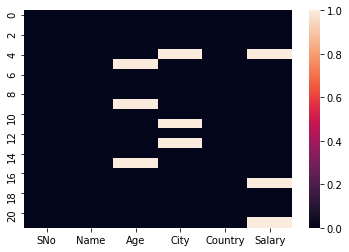

In [5]:
sns.heatmap(df.isnull())

In [6]:
#Before imputing lets check the datatype
df.dtypes
#datatypes are as expected

SNo          int64
Name        object
Age        float64
City        object
Country     object
Salary     float64
dtype: object

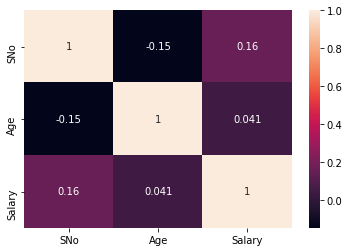

In [7]:
sns.heatmap(df.corr(),annot=True)

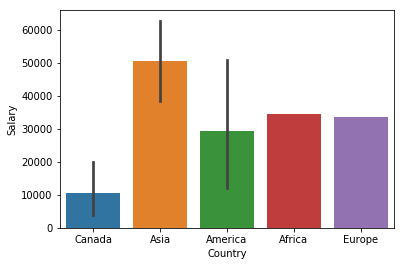

In [8]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(x="Country",y="Salary",data=df)
plt.show()

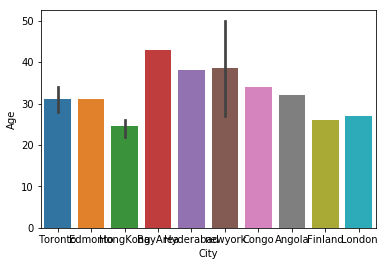

In [9]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(y="Age",x="City",data=df)
plt.show()

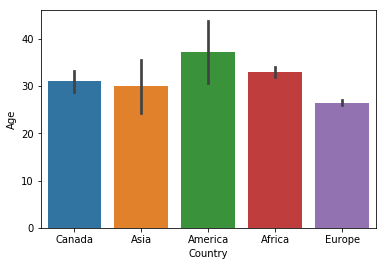

In [10]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(y="Age",x="Country",data=df)
plt.show()

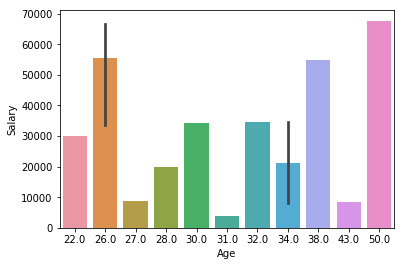

In [11]:
#lets do some graphical analysis
import seaborn as sns
import matplotlib.pyplot as plt
#lets draw bar graph which shows average salary in each country
sns.barplot(x="Age",y="Salary",data=df)
plt.show()

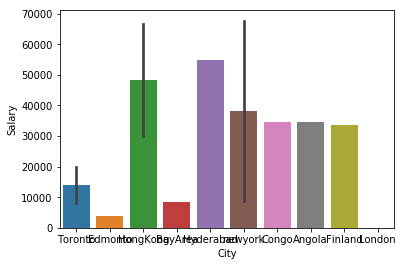

In [12]:
#let's plot the bar graph between city and salary
sns.barplot(x="City",y="Salary",data=df)
plt.show()

In [13]:
#Now lets impute the null values in columns Age,City and Salary as found above
#For salary we will impute by groupping the cities
col_to_impute=["Age","City"]
for col in col_to_impute:
    if df[col].dtype!="object":
        df[col].fillna(df[col].mean(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)
        

In [14]:
#lets again check the null values
df.isnull().sum()
#Only salary column is left which we will impute my taking mean of salaries belonging to same city

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     3
dtype: int64

In [15]:
df_slry_grpby_city=df.groupby(["City"]).agg({"Salary":"mean"})

In [16]:
for index in df_slry_grpby_city.index:
    df.loc[df["City"]==index,["Salary"]]=df.loc[df["City"]==index,["Salary"]].fillna(df_slry_grpby_city.loc[index])

In [17]:
#lets again check the null values
df.isnull().sum()
#one value is left as single instance of that city was there and it was nan so for that we will direcly take mean of salary column

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     1
dtype: int64

In [18]:
#imputing last null value in salary column as mentioned above
df["Salary"].fillna(df["Salary"].mean(),inplace=True)

In [19]:
#again checking the null values
df.isnull().sum()
#All null values we have imputed

SNo        0
Name       0
Age        0
City       0
Country    0
Salary     0
dtype: int64

In [20]:
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.000000
1,2,Lee,31.0,Edmonto,Canada,3900.000000
2,3,Dave,34.0,Toronto,Canada,8000.000000
3,4,Anik,26.0,HongKong,Asia,66672.000000
4,5,kamal,30.0,HongKong,America,39333.666667


In [21]:
import numpy as np
for col in df.columns:
    if df[col].dtype!="object":
        print("column name : "+col+" and skewness is : ",df[col].skew())
        if df[col].skew() > 0.55:
            df[col]=np.log1p(df[col])

column name : SNo and skewness is :  -0.042047349267333736
column name : Age and skewness is :  1.034731645219974
column name : Salary and skewness is :  0.3169751648063996


In [22]:
#lets check skewness again
df.skew()
#In above cell df_employee[col].dtype!="object" is not required as skew function returns skewness for numeric columns

SNo      -0.042047
Age       0.527799
Salary    0.316975
dtype: float64

In [23]:
df.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,3.367296,Toronto,Canada,20000.000000
1,2,Lee,3.465736,Edmonto,Canada,3900.000000
2,3,Dave,3.555348,Toronto,Canada,8000.000000
3,4,Anik,3.295837,HongKong,Asia,66672.000000
4,5,kamal,3.433987,HongKong,America,39333.666667


In [24]:
df=df.drop('Name',axis=1)

In [25]:
df=df.drop('SNo',axis=1)

In [26]:
#lets use pd.get_dummies function to convert categorical columns numeric form which machine can uderstand
df=pd.get_dummies(df,drop_first=True)

In [27]:
df.describe()

,Age,Salary,City_BayArea,City_Congo,City_Edmonto,City_Finland,City_HongKong,City_Hyderabad,City_London,City_Toronto,City_newyork,Country_America,Country_Asia,Country_Canada,Country_Europe
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,3.491648,32585.365079,0.045455,0.045455,0.090909,0.045455,0.318182,0.090909,0.045455,0.090909,0.181818,0.363636,0.272727,0.181818,0.090909
std,0.188889,22404.626503,0.213201,0.213201,0.294245,0.213201,0.476731,0.294245,0.213201,0.294245,0.394771,0.492366,0.455842,0.394771,0.294245
min,3.135494,3900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.340977,8888.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.481122,33018.182540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.555348,50832.916667,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.750000,0.000000,0.000000
max,3.931826,67666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
#Lets seprate input and output
x=df.drop(columns=["Salary"])
y=df[["Salary"]]

In [29]:
x.shape,y.shape

((22, 14), (22, 1))

In [30]:
#scaling the imput variable
#Linearregression algorithm requires all features to be on common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
def max_r2_score(clf,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(clf,"max r2 score corresponding to ",final_r_state," is ",max_r_score)

In [32]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')
model=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor()]
for m in model:
    max_r2_score(m,x,y)
    
    


LinearRegression() max r2 score corresponding to  67  is  0.8101571500821392
DecisionTreeRegressor() max r2 score corresponding to  94  is  0.991647533011979
RandomForestRegressor() max r2 score corresponding to  95  is  0.782486602209641
KNeighborsRegressor() max r2 score corresponding to  71  is  0.4584465857185638


In [33]:
# Fitting Random Forest Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.20)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print('r2_score',r2_score(y_train, regressor.predict(x_train)))
rf_accuracy = round(regressor.score(x_train,y_train),2)
print('rf_accuracy:',rf_accuracy)

r2_score 0.998087142272177
rf_accuracy: 1.0


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
cv_score = cross_val_score(regressor, x_train, y_train, cv=5, scoring='r2')
print(np.sqrt(np.abs(cv_score)))

[ 0.74483795  1.73451045 50.33139311  0.99937314  0.49661806]


In [35]:
#lets apply cross val_score
from sklearn.model_selection import cross_val_score
cross_val_score(regressor,x,y,cv=5,scoring='r2').mean()

-138.27670063472993

In [36]:
#Lets save this model using joblib
#Lets save the above model
from joblib import dump, load
dump(regressor, 'salary.joblib') 


['salary.joblib']

as conclusion we should have more data to find and improve the accuracy of model 